In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# import survey data

survey = pd.read_csv('../../Data/Processed/Sprint3 - sample_tweets_survey_answers - Erjon.csv')
tweets = pd.read_csv('../../Data/Processed/Sprint4 - sample_tweets_complete - Erjon.csv')

In [18]:
tweets = tweets[['text','labels_sentiment_0_sentiment','labels_topic_0_topic']]
tweets.columns = ['text','sentiment','topic']

In [64]:
survey

,Timestamp,What is your name?,@TLRailUK why don't the doors open at every station to save us folk having to touch the button?!,"If complaint, whats the topic?",@TLRailUK When on phone to @LNER they said as it was cancelled they've also cancelled ticket and issued refund so now no ticket. That shows on time but all trains going via Croydon before reaching Stevenage so looks like all will be delayed/cancelled,"If complaint, whats the topic?.1","@LiveCommute @bus131 @tlupdates @TLRailUK @brighton_line They are monopolies which go unregulated regarding genuine customer experience, hence three hour train journeys without tables, trays, heating, luggage racks even though they service two of Europes busiest airports. It's a failed industry.","If complaint, whats the topic?.2",@TLRailUK what is going on with the 17:11 from BFR to PLU? We've been on the train for the best part of an hour and are still stuck outside Deptford? Delay repay? Will it ever get to PLU?,"If complaint, whats the topic?.3",...,1012 Thameslink train to Cambridge: Delayed - plat 7 1038 Great Northern train to Moorgate: On time - plat 1 1039 Great Northern train to Hertford North: Cancelled 1022 Thameslink train to Brighton: expected 1042 - plat 2 1043 Great Northern train to Moorgate: Cancelled,"If complaint, whats the topic?.96",TRAVEL: 15 minute delays on @SouthernRailUK @TLRailUK at #Redhill due to a points failure,"If complaint, whats the topic?.97",@TLRailUK What's happening?? Driver hasn't given an announcement in 20 mins - doors are locked and meanwhile trains are going past we could get on,"If complaint, whats the topic?.98",Evening @tlrailuk - you cancel the 1724 ZFD to HHE due to no staff and the 1724 following service is overcrowded with no guard (we had one this morning) to tell that air con is broken - carriage 412114 - rear carriage going south.,"If complaint, whats the topic?.99",@TLRailUK You opened the doors 20 seconds after a train on the parallel platform pulled away. That is absolutely terrible service.,"If complaint, whats the topic?.100"
0,2023/10/31 1:37:36 pm CET,Cem,Complaint,Doors,Complaint,Delays,Complaint,Train General,Complaint,Delay,...,Complaint,Delay,Complaint,Delay,Complaint,"Doors, Announcement, Train General",Complaint,Service,Complaint,Doors
1,2023/10/31 1:37:57 pm CET,ecem,Complaint,Doors,Complaint,Delay,Complaint,Service,Complaint,Delay,...,Complaint,Delay,Complaint,Delay,Complaint,Announcement,Complaint,HVAC,Complaint,Doors
2,2023/11/01 12:28:37 am CET,Shinu J,Complaint,Doors,Uncertain,NaN,Complaint,Absence of amenities,Complaint,Train Delay,...,Non-Complaint,NaN,Non-Complaint,NaN,Complaint,"No announcement, doors",Complaint,"no staff, overcrowding",Complaint,"doors, delays"
3,2023/11/01 11:48:35 am CET,Akshay,Complaint,Door,Complaint,Delay,Complaint,Customer experience,Complaint,Delay,...,Non-Complaint,NaN,Non-Complaint,NaN,Complaint,Doors closed while train delayed on platform,Complaint,Staff shortage,Complaint,Delay opening doors
4,2023/11/01 9:03:06 pm CET,Erjon,Complaint,doors,Complaint,cancellations,Complaint,Experience,Complaint,Communication,...,Non-Complaint,NaN,Non-Complaint,NaN,Complaint,Communication,Non-Complaint,NaN,Complaint,Experience


In [100]:
# Creating a new DataFrame with the required columns
new_columns = ["text", "Complaint number", "non complaint number", 
               "uncertain number", "Cem", "ecem", "Shinu J", 
               "Akshay", "Erjon"]
new_df = pd.DataFrame(columns=new_columns)

# Populate the "text" column with the column names of the complaint statements
text_columns = survey.columns[2::2]  # Selecting every odd-numbered column starting from the 3rd
new_df["text"] = text_columns

# Count the number of complaints, non-complaints, and uncertain entries for each text
complaint_counts = []
non_complaint_counts = []
uncertain_counts = []
topics = {name: [] for name in new_columns[4:]}

for text_col in text_columns:
    # Count the occurrences of each type in the corresponding column
    complaint_counts.append((survey[text_col] == "Complaint").sum())
    non_complaint_counts.append((survey[text_col] == "Non-Complaint").sum())
    uncertain_counts.append((survey[text_col] == "Uncertain").sum())

# Iterate over each text column
for text_col in text_columns:
    topic_col = survey.columns[survey.columns.get_loc(text_col) + 1]  # The next column contains the topics
    
    # Reset current_topics for each text column
    current_topics = {reviewer: None for reviewer in topics}
    
    # Iterate over each row in the DataFrame
    for _, row in survey.iterrows():
        reviewer_name = row['What is your name?'].strip().lower()
        for reviewer in topics:
            # Check if the lowercase stripped name matches any reviewer
            if reviewer.lower() == reviewer_name:
                current_topics[reviewer] = row[topic_col]
                break

    # Append the topic for each reviewer
    for reviewer in topics:
        topics[reviewer].append(current_topics[reviewer])

# Now, add the topics to the new DataFrame
for reviewer, topic_list in topics.items():
    new_df[reviewer] = topic_list

# Add counts to the new DataFrame
new_df["Complaint number"] = complaint_counts
new_df["non complaint number"] = non_complaint_counts
new_df["uncertain number"] = uncertain_counts

# Display the first few rows of the transformed DataFrame
new_df

,text,Complaint number,non complaint number,uncertain number,Cem,ecem,Shinu J,Akshay,Erjon
0,@TLRailUK why don't the doors open at every st...,5,0,0,Doors,Doors,Doors,Door,doors
1,@TLRailUK When on phone to @LNER they said as ...,4,0,1,Delays,Delay,NaN,Delay,cancellations
2,@LiveCommute @bus131 @tlupdates @TLRailUK @bri...,5,0,0,Train General,Service,Absence of amenities,Customer experience,Experience
3,@TLRailUK what is going on with the 17:11 from...,5,0,0,Delay,Delay,Train Delay,Delay,Communication
4,@NetworkRailSE @SouthernRailUK #TLUpdates - Th...,1,4,0,NaN,NaN,NaN,Delay,NaN
...,...,...,...,...,...,...,...,...,...
96,1012 Thameslink train to Cambridge: Delayed - ...,2,3,0,Delay,Delay,NaN,NaN,NaN
97,TRAVEL: 15 minute delays on @SouthernRailUK @T...,2,3,0,Delay,Delay,NaN,NaN,NaN
98,@TLRailUK What's happening?? Driver hasn't giv...,5,0,0,"Doors, Announcement, Train General",Announcement,"No announcement, doors",Doors closed while train delayed on platform,Communication
99,Evening @tlrailuk - you cancel the 1724 ZFD to...,4,1,0,Service,HVAC,"no staff, overcrowding",Staff shortage,NaN


In [101]:
new_df['pattern'] = new_df['Complaint number'].astype(str) + new_df['non complaint number'].astype(str) + new_df['uncertain number'].astype(str)
new_df['pattern'].value_counts()
new_df

,text,Complaint number,non complaint number,uncertain number,Cem,ecem,Shinu J,Akshay,Erjon,pattern
0,@TLRailUK why don't the doors open at every st...,5,0,0,Doors,Doors,Doors,Door,doors,500
1,@TLRailUK When on phone to @LNER they said as ...,4,0,1,Delays,Delay,NaN,Delay,cancellations,401
2,@LiveCommute @bus131 @tlupdates @TLRailUK @bri...,5,0,0,Train General,Service,Absence of amenities,Customer experience,Experience,500
3,@TLRailUK what is going on with the 17:11 from...,5,0,0,Delay,Delay,Train Delay,Delay,Communication,500
4,@NetworkRailSE @SouthernRailUK #TLUpdates - Th...,1,4,0,NaN,NaN,NaN,Delay,NaN,140
...,...,...,...,...,...,...,...,...,...,...
96,1012 Thameslink train to Cambridge: Delayed - ...,2,3,0,Delay,Delay,NaN,NaN,NaN,230
97,TRAVEL: 15 minute delays on @SouthernRailUK @T...,2,3,0,Delay,Delay,NaN,NaN,NaN,230
98,@TLRailUK What's happening?? Driver hasn't giv...,5,0,0,"Doors, Announcement, Train General",Announcement,"No announcement, doors",Doors closed while train delayed on platform,Communication,500
99,Evening @tlrailuk - you cancel the 1724 ZFD to...,4,1,0,Service,HVAC,"no staff, overcrowding",Staff shortage,NaN,410


In [104]:
# remove rows that contain the letter 5 or 4 in the pattern

filtered_new_df = new_df[~new_df['pattern'].str.contains('5|4')]

<Axes: xlabel='pattern'>

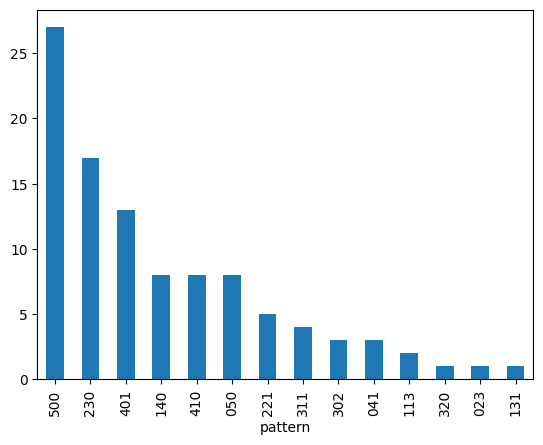

In [102]:
# plot the value counts of the patterns

new_df['pattern'].value_counts().plot(kind='bar')

In [129]:
# some statistics

print('The number of tweets in which we all agree is a complaint: ', len(new_df[new_df['pattern'].str.contains('500')]))
print('The number of tweets in which we all agree is not a complaint: ', len(new_df[new_df['pattern'].str.contains('050')]))
print('The number of tweets in which its 4 votes for a complaint: ', len(new_df[new_df['pattern'].str.contains('410|401')]))
print('The number of tweets in which its 4 votes for a non complaint: ', len(new_df[new_df['pattern'].str.contains('140|041')]))
print('The number of tweets where there is no agreement: ', len(new_df[new_df['pattern'].str.contains('3|2')]))

The number of tweets in which we all agree is a complaint:  27
The number of tweets in which we all agree is not a complaint:  8
The number of tweets in which its 4 votes for a complaint:  21
The number of tweets in which its 4 votes for a non complaint:  11
The number of tweets where there is no agreement:  34


<Axes: xlabel='pattern'>

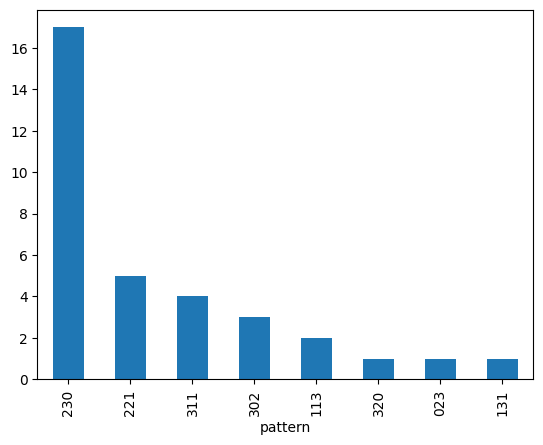

In [130]:
filtered_new_df['pattern'].value_counts().plot(kind='bar')